## Observations


In [2]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#from config import api_key

# Google developer API key
#from config.py import gkey


### Industry related data and analysis section

In [3]:
file = '2019_emp.xlsx'

In [4]:
county1 = pd.read_excel(file, sheet_name=3, header=None, skiprows=13)
county2 = pd.read_excel(file, sheet_name=4, header=None, skiprows=13)
county3 = pd.read_excel(file, sheet_name=5, header=None, skiprows=13)

In [5]:
county1.columns =["County", "JAN'19", "FEB'19", "MAR'19", "APR'19", "MAY'19", "JUN'19", "JUL'19", "AUG'19", "SEP'19", "OCT'19", 
                  "NOV'19", "DEC'19", "ANN. AV.'19'"]
county1

,County,JAN'19,FEB'19,MAR'19,APR'19,MAY'19,JUN'19,JUL'19,AUG'19,SEP'19,OCT'19,NOV'19,DEC'19,ANN. AV.'19'
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,123000,121600,121300,121700
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,117500,116000,115400,115800
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,5500,5600,5900,5900
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,4.5,4.6,4.9,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,4563800,4564200,4570400,4522200
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,4417500,4416800,4421900,4367300
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,146200,147400,148500,154900


In [6]:
county2.columns =["County", "JAN'20", "FEB'20", "MAR'20", "APR'20", "MAY'20", "JUN'20", "JUL'20", "AUG'20", "SEP'20",
                  "OCT'20", "NOV'20", "DEC'20", "ANN. AV.'20'"]
county2

,County,JAN'20,FEB'20,MAR'20,APR'20,MAY'20,JUN'20,JUL'20,AUG'20,SEP'20,OCT'20,NOV'20,DEC'20,ANN. AV.'20'
0,Atlantic County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,120900.0,122700.0,122900.0,122800.0,120800.0,123200.0,128300.0,123000.0,116600.0,115900.0,120300.0,114800.0,121000.0
2,Atlantic County Employment,113200.0,115400.0,115300.0,80600.0,77400.0,80600.0,98600.0,101700.0,103000.0,103600.0,103200.0,101900.0,99500.0
3,Atlantic County Unemployment,7600.0,7300.0,7600.0,42200.0,43500.0,42600.0,29700.0,21400.0,13600.0,12300.0,17100.0,12900.0,21500.0
4,Atlantic County Unemployment Rate (%),6.3,6.0,6.2,34.4,36.0,34.6,23.1,17.4,11.7,10.6,14.2,11.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4568400.0,4596000.0,4560300.0,4439000.0,4467300.0,4521300.0,4657000.0,4548000.0,4348300.0,4370900.0,4492700.0,4372800.0,4495200.0
107,New Jersey Employment,4381700.0,4414700.0,4370400.0,3709700.0,3724500.0,3792100.0,4025600.0,4053400.0,4015300.0,4060100.0,4059300.0,4056500.0,4055300.0
108,New Jersey Unemployment,186700.0,181400.0,189900.0,729300.0,742800.0,729200.0,631400.0,494600.0,333000.0,310700.0,433400.0,316400.0,439900.0


In [7]:
county3.columns =["County", "JAN'21", "FEB'21", "MAR'21", "APR'21", "MAY'21", "JUN'21", "JUL'21", "AUG'21", "SEP'21",
                 "OCT'21", "NOV'21", "DEC'21", "ANN. AV.'21"]
county3 = county3.drop(labels= ["JUN'21", "JUL'21", "AUG'21", "SEP'21",
                 "OCT'21", "NOV'21", "DEC'21", "ANN. AV.'21"], axis=1)
#student_df = student_df.dropna(axis='columns')
county3

,County,JAN'21,FEB'21,MAR'21,APR'21,MAY'21
0,Atlantic County,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,115300.0,116600.0,117100.0,116600.0,117600.0
2,Atlantic County Employment,100800.0,102100.0,103400.0,104000.0,105700.0
3,Atlantic County Unemployment,14400.0,14500.0,13600.0,12600.0,11900.0
4,Atlantic County Unemployment Rate (%),12.5,12.4,11.6,10.8,10.1
...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4373300.0,4403200.0,4439200.0,4391800.0,4390200.0
107,New Jersey Employment,4023900.0,4040100.0,4092300.0,4081300.0,4088900.0
108,New Jersey Unemployment,349300.0,363100.0,346800.0,310500.0,301200.0


In [8]:
#work out the columns that are only in one DataFrame and use this to select a subset of columns in the merge.
columns_to_use = county2.columns.difference(county1.columns)
county_complete= pd.merge(county1, county2[columns_to_use], left_index=True, right_index=True, how="outer")
county_complete

,County,JAN'19,FEB'19,MAR'19,APR'19,MAY'19,JUN'19,JUL'19,AUG'19,SEP'19,...,DEC'20,FEB'20,JAN'20,JUL'20,JUN'20,MAR'20,MAY'20,NOV'20,OCT'20,SEP'20
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,...,114800.0,122700.0,120900.0,128300.0,123200.0,122900.0,120800.0,120300.0,115900.0,116600.0
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,...,101900.0,115400.0,113200.0,98600.0,80600.0,115300.0,77400.0,103200.0,103600.0,103000.0
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,...,12900.0,7300.0,7600.0,29700.0,42600.0,7600.0,43500.0,17100.0,12300.0,13600.0
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,11.3,6.0,6.3,23.1,34.6,6.2,36.0,14.2,10.6,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,...,4372800.0,4596000.0,4568400.0,4657000.0,4521300.0,4560300.0,4467300.0,4492700.0,4370900.0,4348300.0
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,...,4056500.0,4414700.0,4381700.0,4025600.0,3792100.0,4370400.0,3724500.0,4059300.0,4060100.0,4015300.0
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,...,316400.0,181400.0,186700.0,631400.0,729200.0,189900.0,742800.0,433400.0,310700.0,333000.0


In [9]:
columns_to_use = county3.columns.difference(county_complete.columns)
county_full= pd.merge(county_complete, county3[columns_to_use], left_index=True, right_index=True, how="outer")
county_full

,County,JAN'19,FEB'19,MAR'19,APR'19,MAY'19,JUN'19,JUL'19,AUG'19,SEP'19,...,MAR'20,MAY'20,NOV'20,OCT'20,SEP'20,APR'21,FEB'21,JAN'21,MAR'21,MAY'21
0,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,Atlantic County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic County Labor Force,118900,119900,120100,119300,120100,123300,125500,125000,122800,...,122900.0,120800.0,120300.0,115900.0,116600.0,116600.0,116600.0,115300.0,117100.0,117600.0
2,Atlantic County Employment,111200,112700,113600,114200,115100,117900,119400,119300,117500,...,115300.0,77400.0,103200.0,103600.0,103000.0,104000.0,102100.0,100800.0,103400.0,105700.0
3,Atlantic County Unemployment,7700,7200,6400,5100,5000,5400,6100,5700,5300,...,7600.0,43500.0,17100.0,12300.0,13600.0,12600.0,14500.0,14400.0,13600.0,11900.0
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,6.2,36.0,14.2,10.6,11.7,10.8,12.4,12.5,11.6,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,New Jersey Labor Force,4459100,4488800,4482700,4455600,4477800,4538900,4584000,4555500,4525500,...,4560300.0,4467300.0,4492700.0,4370900.0,4348300.0,4391800.0,4403200.0,4373300.0,4439200.0,4390200.0
107,New Jersey Employment,4272200,4308800,4320800,4326900,4343400,4391500,4412100,4394800,4380300,...,4370400.0,3724500.0,4059300.0,4060100.0,4015300.0,4081300.0,4040100.0,4023900.0,4092300.0,4088900.0
108,New Jersey Unemployment,186800,180000,161900,128800,134300,147400,171900,160700,145300,...,189900.0,742800.0,433400.0,310700.0,333000.0,310500.0,363100.0,349300.0,346800.0,301200.0


In [10]:

county_full_rows= county_full.iloc[range(4, len(county_full), 5)]
county_full_rows

,County,JAN'19,FEB'19,MAR'19,APR'19,MAY'19,JUN'19,JUL'19,AUG'19,SEP'19,...,MAR'20,MAY'20,NOV'20,OCT'20,SEP'20,APR'21,FEB'21,JAN'21,MAR'21,MAY'21
4,Atlantic County Unemployment Rate (%),6.5,6,5.3,4.3,4.2,4.4,4.9,4.6,4.3,...,6.2,36.0,14.2,10.6,11.7,10.8,12.4,12.5,11.6,10.1
9,Bergen County Unemployment Rate (%),3.3,3.2,2.9,2.3,2.5,2.7,3.2,3,2.7,...,3.4,16.6,9.5,7.2,7.8,6.8,7.8,7.6,7.4,6.7
14,Burlington County Unemployment Rate (%),3.8,3.7,3.3,2.6,2.8,3,3.6,3.4,3,...,3.6,14.1,8.0,5.8,6.2,5.8,7.0,6.6,6.5,5.7
19,Camden County Unemployment Rate (%),4.7,4.4,4,3.3,3.4,3.8,4.3,4.1,3.7,...,4.5,16.9,10.0,7.3,7.7,7.4,8.6,8.3,8.1,7.2
24,Cape May County Unemployment Rate (%),13.3,11.8,10.7,7.5,5,4.2,3.9,3.6,4,...,12.3,24.6,12.0,7.3,7.4,10.0,13.4,12.9,12.6,8.2
29,Cumberland County Unemployment Rate (%),6.8,6.5,5.8,4.5,4.3,4.7,5.7,5.3,4.6,...,6.7,16.5,10.2,7.2,7.9,8.2,10.1,9.8,9.5,7.8
34,Essex County Unemployment Rate (%),5,4.7,4.3,3.6,3.8,4.2,4.7,4.5,4.2,...,5.2,18.2,12.5,9.3,9.9,9.0,10.1,10.0,9.7,8.7
39,Gloucester County Unemployment Rate (%),4.3,4.1,3.6,2.9,3.1,3.4,4,3.7,3.3,...,4.2,16.0,8.8,6.3,6.8,6.7,8.0,7.6,7.4,6.5
44,Hudson County Unemployment Rate (%),3.7,3.5,3.2,2.6,2.8,3.1,3.5,3.3,3,...,3.8,17.7,11.1,8.4,9.1,7.8,8.8,8.7,8.4,7.6
49,Hunterdon County Unemployment Rate (%),3.4,3.3,2.9,2.1,2.3,2.5,2.9,2.7,2.5,...,3.3,12.3,7.0,5.0,5.3,5.1,6.3,5.9,5.9,5.0


In [11]:
county_full_rows_transposed= county_full_rows.T
county_full_rows_transposed= county_full_rows_transposed.iloc[1:32]
county_full_rows_transposed.columns =["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                      "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                      "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren", "New Jersey"]
county_full_rows_transposed

,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
JAN'19,6.5,3.3,3.8,4.7,13.3,6.8,5,4.3,3.7,3.4,...,3.8,3.3,4.6,5.1,5.6,3.4,4.2,4.3,4.1,4.2
FEB'19,6,3.2,3.7,4.4,11.8,6.5,4.7,4.1,3.5,3.3,...,3.7,3.2,4.4,4.9,5.4,3.4,4.1,4.1,3.9,4
MAR'19,5.3,2.9,3.3,4,10.7,5.8,4.3,3.6,3.2,2.9,...,3.3,2.9,3.9,4.4,4.9,3,3.7,3.8,3.6,3.6
APR'19,4.3,2.3,2.6,3.3,7.5,4.5,3.6,2.9,2.6,2.1,...,2.6,2.3,3,3.6,3.9,2.4,2.7,3,2.7,2.9
MAY'19,4.2,2.5,2.8,3.4,5,4.3,3.8,3.1,2.8,2.3,...,2.7,2.4,3,3.6,3.9,2.6,2.8,3.1,2.7,3
JUN'19,4.4,2.7,3,3.8,4.2,4.7,4.2,3.4,3.1,2.5,...,2.9,2.6,3.2,3.9,4.4,2.8,3,3.4,3.1,3.2
JUL'19,4.9,3.2,3.6,4.3,3.9,5.7,4.7,4,3.5,2.9,...,3.3,3,3.7,4.6,5,3.2,3.6,3.9,3.7,3.8
AUG'19,4.6,3,3.4,4.1,3.6,5.3,4.5,3.7,3.3,2.7,...,3.1,2.8,3.4,4.4,4.8,3,3.3,3.7,3.4,3.5
SEP'19,4.3,2.7,3,3.7,4,4.6,4.2,3.3,3,2.5,...,2.8,2.6,3.2,3.8,4.4,2.8,3,3.4,2.9,3.2
OCT'19,4.5,2.7,3,3.7,5.3,4.7,4.1,3.3,3,2.4,...,2.8,2.5,3.2,3.8,4.4,2.7,3,3.3,2.9,3.2


In [12]:
county_full_rows_transposed.index.name = "Months"
county_full_rows_transposed


,Atlantic,Bergen,Burlington,Camden,Cape May,Cumberland,Essex,Gloucester,Hudson,Hunterton,...,Monmouth,Morris,Ocean,Passaic,Salem,Somerset,Sussex,Union,Warren,New Jersey
Months,,,,,,,,,,,,,,,,,,,,,
JAN'19,6.5,3.3,3.8,4.7,13.3,6.8,5,4.3,3.7,3.4,...,3.8,3.3,4.6,5.1,5.6,3.4,4.2,4.3,4.1,4.2
FEB'19,6,3.2,3.7,4.4,11.8,6.5,4.7,4.1,3.5,3.3,...,3.7,3.2,4.4,4.9,5.4,3.4,4.1,4.1,3.9,4
MAR'19,5.3,2.9,3.3,4,10.7,5.8,4.3,3.6,3.2,2.9,...,3.3,2.9,3.9,4.4,4.9,3,3.7,3.8,3.6,3.6
APR'19,4.3,2.3,2.6,3.3,7.5,4.5,3.6,2.9,2.6,2.1,...,2.6,2.3,3,3.6,3.9,2.4,2.7,3,2.7,2.9
MAY'19,4.2,2.5,2.8,3.4,5,4.3,3.8,3.1,2.8,2.3,...,2.7,2.4,3,3.6,3.9,2.6,2.8,3.1,2.7,3
JUN'19,4.4,2.7,3,3.8,4.2,4.7,4.2,3.4,3.1,2.5,...,2.9,2.6,3.2,3.9,4.4,2.8,3,3.4,3.1,3.2
JUL'19,4.9,3.2,3.6,4.3,3.9,5.7,4.7,4,3.5,2.9,...,3.3,3,3.7,4.6,5,3.2,3.6,3.9,3.7,3.8
AUG'19,4.6,3,3.4,4.1,3.6,5.3,4.5,3.7,3.3,2.7,...,3.1,2.8,3.4,4.4,4.8,3,3.3,3.7,3.4,3.5
SEP'19,4.3,2.7,3,3.7,4,4.6,4.2,3.3,3,2.5,...,2.8,2.6,3.2,3.8,4.4,2.8,3,3.4,2.9,3.2


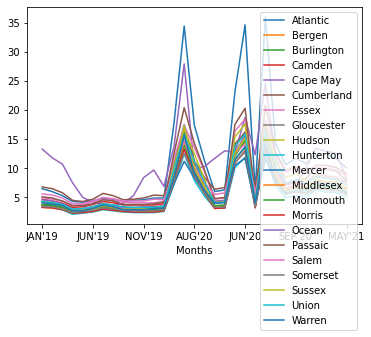

In [13]:
county_full_rows_transposed.reset_index().plot(x="Months", y=["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                 "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                  "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren"])
#county_full_rows_transposed.plot(county_full_rows_transposed.iloc["Months"], ["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                                 #"Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                                  #"Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren"], kind ="line")

In [91]:
county2019 = county_full_rows.groupby(["ANN. AV.'19'"])

#.count().plot(kind="pie", y="ANN. AV.'19'", shadow=True, autopct="%1.1f%%", figsize=(15,20))

#county2019_count = pd.DataFrame(county2019["County"])
#county2019_count.columns = ["Ann. Av.'19'", "County"]
#county2019_count

#county_list=("Hunterdon", "Morris", "Bergen", "Somerset", "Mercer", "Monmouth", 
                                 #"Burlington", "Sussex", "New Jersey", "Gloucester", "Camden", "Passaic", "Essex", "Salem", 
                                 #"Atlantic", "Cumberland", "Cape May", "Middlesex", "Sussex", "Union", "Warren")
#county2019_count.plot(kind="pie", 
                    # y = "Ann. Av.'19'",  
                      #labels = county_list, autopct="%1.1f%%", figsize=(15,20))
# Tell matplotlib to create a pie chart based upon the above data

#Y axis label
#county2019_pie.set_ylabel("ANN. AV.'19'")
                                               

#plt.tight_layout()
#plt.show()

In [248]:
county_full_rows = pd.DataFrame({"County",
                   "ANN. AV.'19'"},
                  index=["Atlantic", "Bergen", "Burlington", "Camden", "Cape May", "Cumberland", 
                        "Essex", "Gloucester", "Hudson", "Hunterton", "Mercer", "Middlesex", "Monmouth", "Morris", 
                         "Ocean", "Passaic", "Salem", "Somerset", "Sussex", "Union", "Warren"])
plot = county_full_rows.plot.pie(y="ANN. AV.'19'", figsize=(5, 5))

ValueError: Shape of passed values is (2, 1), indices imply (21, 1)

In [ ]:
# 1. Which industries affected the most and the least. (Meet - Brian)
# a. Public sector vs private sector
# b. How was the recovery?
# c. How did they tackle the situation?
# d. Job openings per industry
# e. Lay off rate, type of laschool_type = school_data.set_index(['school_name'])['type']y off (temp/permanent/others)

In [ ]:
# Add in any additional cells for the "Which industries affected ..." like data, plots, and analysis

### Age group data and analysis section

In [ ]:
# This section is for "Which age group affeted the most and least." (Megan - Byron)

In [ ]:
# Additional areas for "Age Group" questions like data, plots, and analysis

### Gender related data and analysis

In [ ]:
# Which gender (male/female/other) was affected the most –  marital status. (Vasav) 
# How many people were unemployed in a given family,  
# which ender was highly impactedi a family 
# How many families recovered/found jobs back? 
# Unemployment rates per cit/county in NJ

In [ ]:
# This section is for additional work on "Gender" items listed above. 

### Demographics related data and analysis

In [ ]:
# Which demographics/ethnicity/race affected the most and least. (Shreyas) 

In [ ]:
# Additional work area for "demographics" items like data, plots, analysis

### Additional work items as needed

In [ ]:
# Additional work areas as needed